<a href="https://colab.research.google.com/github/TongtaiM/CNN_Handwrite_Number/blob/main/CNN_Handwrite_Number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import numpy as np
from tensorflow.keras.datasets.mnist import load_data
import cv2

In [64]:
(X_train,y_train),(X_test,y_test)=load_data()

In [65]:
# ตรวจดู shape ของข้อมูลเพื่อดูความละเอียดละจำนวนภาพ
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


**resize เพื่อให้ภาพใหญ่ขึ้น**

In [66]:
X_train2 = []
for i in range(60000):
  X_train2.append(cv2.resize(X_train[i], (112, 112)))
X_train = np.array(X_train2)
X_train.shape

(60000, 112, 112)

In [67]:
X_test2 = []
for i in range(10000):
  X_test2.append(cv2.resize(X_test[i], (112, 112)))
X_test = np.array(X_test2)
X_test.shape

(10000, 112, 112)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
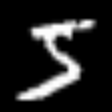

In [68]:
X_train[0]

In [69]:
y_train[0]

5

**ลอง plot ภาพมาดู**

In [70]:
import matplotlib.pyplot as plt

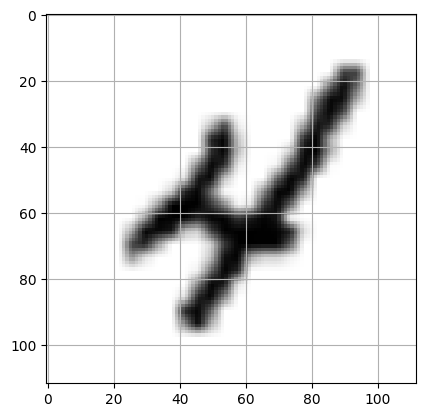

In [71]:
#ลอง plot ภาพมาดู
img = X_train[9]
plt.imshow(img,cmap=plt.cm.gray_r)
plt.grid()
plt.show()

In [72]:
def visual_multi(i):
  nplots=40
  fig=plt.figure(figsize= (8,4))
  for j in range(nplots):
    plt.subplot(4,10,j+1) #4 rows 10 columns
    plt.imshow(X_train[i+j],cmap=plt.cm.gray_r)
    plt.title(y_train[i+j]) #เขียนกำกับเลข
    plt.xticks([])
    plt.yticks([])
  plt.show()

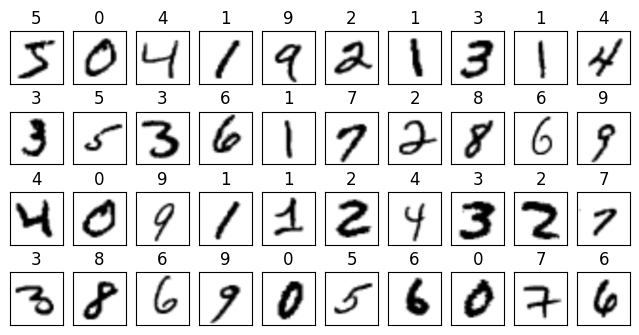

In [73]:
visual_multi(0)

**reshape ภาพให้พร้อมนำเข้าโมเดล**

In [74]:
X_train = X_train.reshape(60000,112,112,1)

In [75]:
X_test = X_test.reshape(10000,112,112,1)

In [76]:
#ตรวจดูค่าเพื่อทำการปรับให้อยู่ระหว่าง 0,1
print(np.max(X_train),np.min(X_train))

255 0


In [77]:
#ปรับภาพให้อยู่ในช่วง 0,1
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

In [78]:
#ดึงข้อมูลมาบางส่วน ก่อนเพื่อให้ fit โมเดลได้เร็วขึ้น
X_train = X_train[:16000]
X_test  = X_test[:4000]
y_train = y_train[:16000]
y_test = y_test[:4000]

In [79]:
#ดูว่าข้อมูล 1000 ค่าสังเกต มีตัวเลขครบทุกตัวไหม
nclass=len(np.unique(y_train))
nclass

10

In [80]:
unique, counts = np.unique(y_test, return_counts=True)
>>> print(np.asarray((unique, counts)).T)

[[  0 370]
 [  1 450]
 [  2 418]
 [  3 408]
 [  4 418]
 [  5 372]
 [  6 378]
 [  7 411]
 [  8 384]
 [  9 391]]


In [81]:
from tensorflow.keras.regularizers import l1,l2

In [82]:
#สร้างตัวแบบ CNN เพื่อทำนาย
from keras.layers import LeakyReLU
inshape=X_train.shape[1:]
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_regularizer=l2(0.001),input_shape=inshape))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(64,(3,3),activation='relu',kernel_regularizer=l2(0.001)))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(128,(3,3),activation='relu',kernel_regularizer=l2(0.001)))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256,(3,3),activation='relu',kernel_regularizer=l2(0.001)))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(6400,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(nclass,activation='softmax'))

In [83]:
#ตรวจดูตัวแบบ
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 110, 110, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 55, 55, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 55, 55, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 53, 53, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 64)        0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 26, 26, 64)       

In [84]:
#สร้างตัวแบบ
from tensorflow.keras.utils import plot_model
plot_model(model,'digit.png',show_shapes=True,show_layer_names=True)
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
import time
start=time.time()
history = model.fit(X_train,y_train,epochs=30,batch_size=500,verbose=0,validation_split=0.1)
end=time.time()

In [85]:
#ดู Accucarcy
score=model.evaluate(X_test,y_test,verbose=0)
print('Accuracy',score[1])
print('loss',score[0])

Accuracy 0.9827499985694885
loss 0.08851297944784164


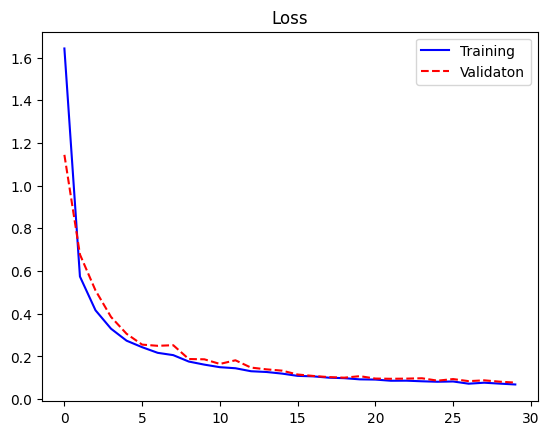

In [86]:
#ตรวจดูค่า loss ว่าเกิดปัญหา overfit หรือไม่
plt.plot(history.history['loss'],color='b',label='Training')
plt.plot(history.history['val_loss'],'r--',label='Validaton')
plt.title("Loss")
plt.legend()
plt.show()

In [87]:
y_pred_p=model.predict(X_test)
y_pred=np.argmax(y_pred_p,axis=1)

125/125 [==============================] - 1s 5ms/step


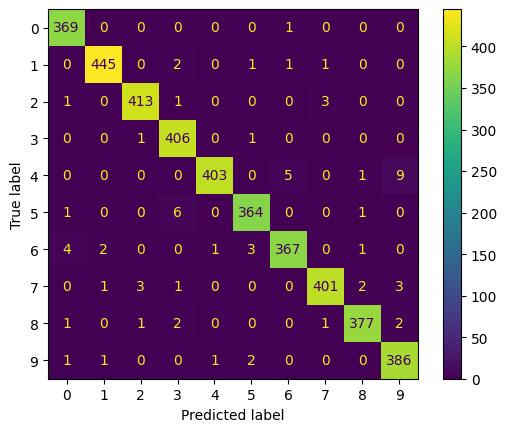

In [88]:
#สร้าง confustion_matrix เพื่อดูว่าเลขไหนถูกผิดยังไงบ้าง
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       377
           1       0.99      0.99      0.99       449
           2       0.99      0.99      0.99       418
           3       1.00      0.97      0.98       418
           4       0.96      1.00      0.98       405
           5       0.98      0.98      0.98       371
           6       0.97      0.98      0.98       374
           7       0.98      0.99      0.98       406
           8       0.98      0.99      0.98       382
           9       0.99      0.96      0.98       400

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000



**นำภาพของแต่ละกลุุ่มเข้า**

In [32]:
from google.colab import drive
drive.mount('/content/gdrive')
import tensorflow_datasets as tfds
import tensorflow as tf

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [33]:
data_dir = '/content/gdrive/MyDrive/Dataset_Number'

In [34]:
dataset = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  image_size=(500, 500),
  batch_size=50,
  color_mode='grayscale')

Found 50 files belonging to 10 classes.


In [35]:
class_names = dataset.class_names
print(class_names)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


**ตรวจดูรูปที่นำเข้า**

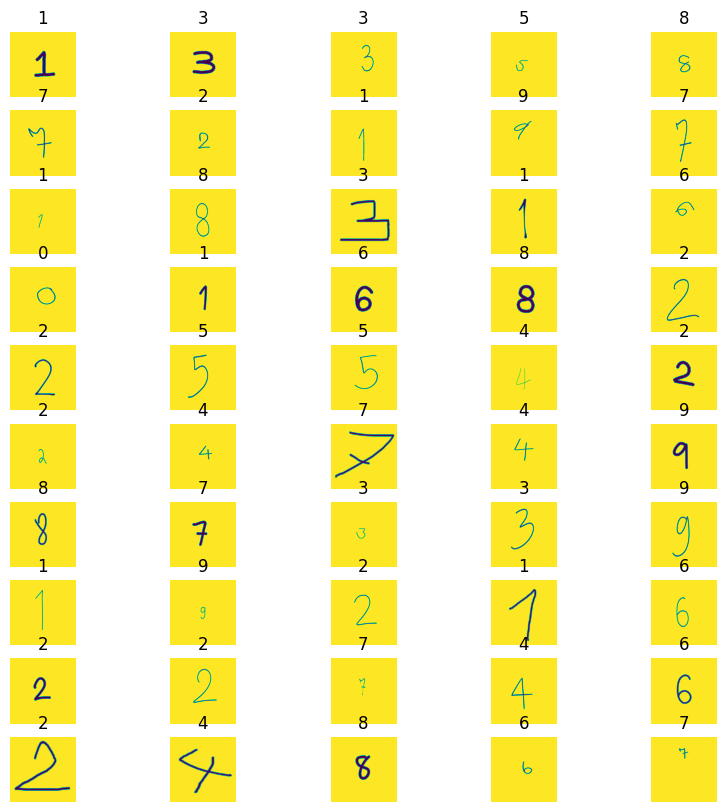

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
  for i in range(50):
    ax = plt.subplot(10, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

**ดึงข้อมูลภาพออกมาแล้วทำให้เป็น numpy array แล้วตรวจดูภาพ**

In [37]:
for image_batch, labels_batch in dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(50, 500, 500, 1)
(50,)


In [38]:
img_r = image_batch.numpy()

In [39]:
y_r = labels_batch.numpy()

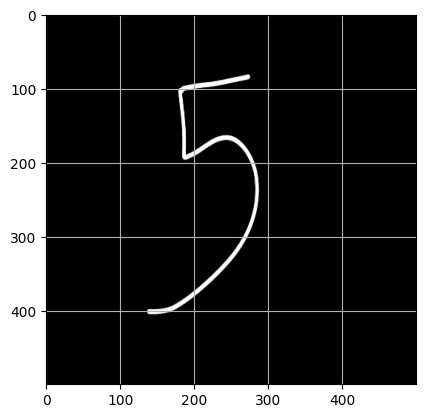

In [40]:
img = img_r[1]
plt.imshow(img,cmap=plt.cm.gray_r)
plt.grid()
plt.show()

**กลับสีภาพขาวดำ เพื่อให้ตรงกับข้อมูลจาก mnist**

In [41]:
img_r_r = 255-img_r

In [42]:
def visual_multi(i):
  nplots=50
  fig=plt.figure(figsize= (10,10))
  for j in range(nplots):
    plt.subplot(5,10,j+1) #4 rows 10 columns
    plt.imshow(img_r_r[i+j],cmap=plt.cm.gray_r)
    plt.title(y_r[i+j]) #เขียนกำกับเลข
    plt.xticks([])
    plt.yticks([])
  plt.show()

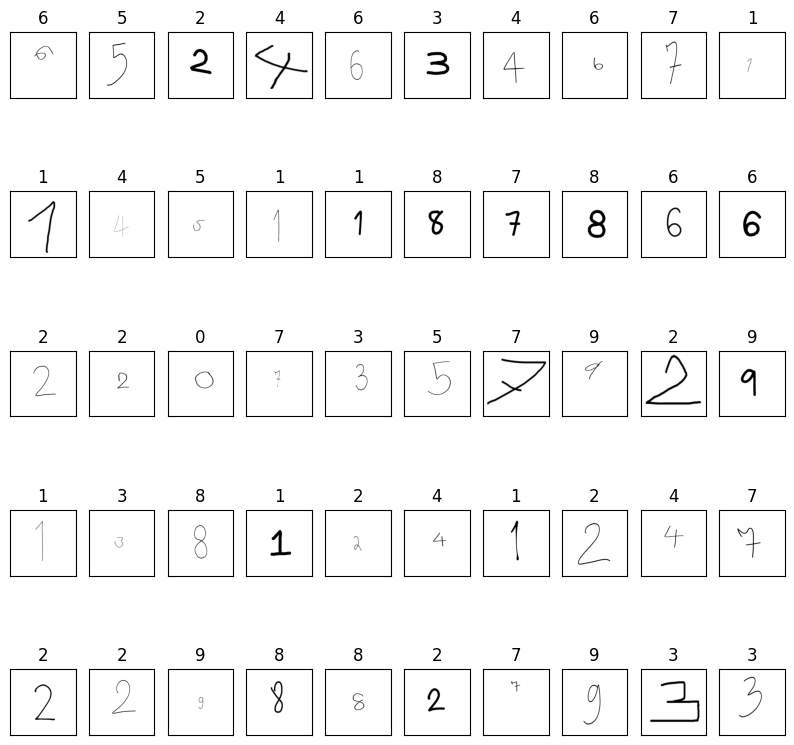

In [43]:
visual_multi(0)

**Crop**

In [44]:
def crop_im(imageT) :
  from PIL import Image
  for y in range(500):
    for x in range(500):
      if imageT[y][x][0] > 51:
        break
    if imageT[y][x][0] > 51:
      min_y = y
      break
  for x in range(500):
    for y in range(500):
      if imageT[y][x][0] > 51:
        break
    if imageT[y][x][0] > 51:
      min_x = x
      break
  for y in reversed(range(500)):
    for x in reversed(range(500)):
      if imageT[x][y][0] > 51:
        break
    if imageT[x][y][0] > 51:
      max_x = y
      break
  for y in reversed(range(500)):
    for x in reversed(range(500)):
      if imageT[y][x][0] > 51:
        break
    if imageT[y][x][0] > 51:
      max_y =y
      break
  cen_x = int((min_x+max_x)/2)
  cen_y = int((min_y+max_y)/2)
  rx = int(max_x - cen_x)
  ry = int(max_y - cen_y)
  r  = int(max(rx,ry))+20
  if min((cen_y - r),(cen_y+r),(cen_x-r),(cen_x+r)) < 0:
    image_crop = imageT[min_y-20:max_y+20,min_x-20:max_x+20]
  else:
    image_crop = imageT[(cen_y - r):(cen_y+r) ,(cen_x-r):(cen_x+r)]
  return cv2.resize(image_crop, (112, 112))

In [45]:
img_r_r_c = []
for i in range(50):
  img_r_r_c.append(crop_im(img_r_r[i]))

In [46]:
img_r_r_c = np.array(img_r_r_c)

**ตรวจดูภาพที่ถูกทำการปรับแล้ว**

In [47]:
def visual_multi(i):
  nplots=50
  fig=plt.figure(figsize= (10,10))
  for j in range(nplots):
    plt.subplot(5,10,j+1) #4 rows 10 columns
    plt.imshow(img_r_r_c[i+j],cmap=plt.cm.gray_r)
    plt.title(y_r[i+j]) #เขียนกำกับเลข
    plt.xticks([])
    plt.yticks([])
  plt.show()

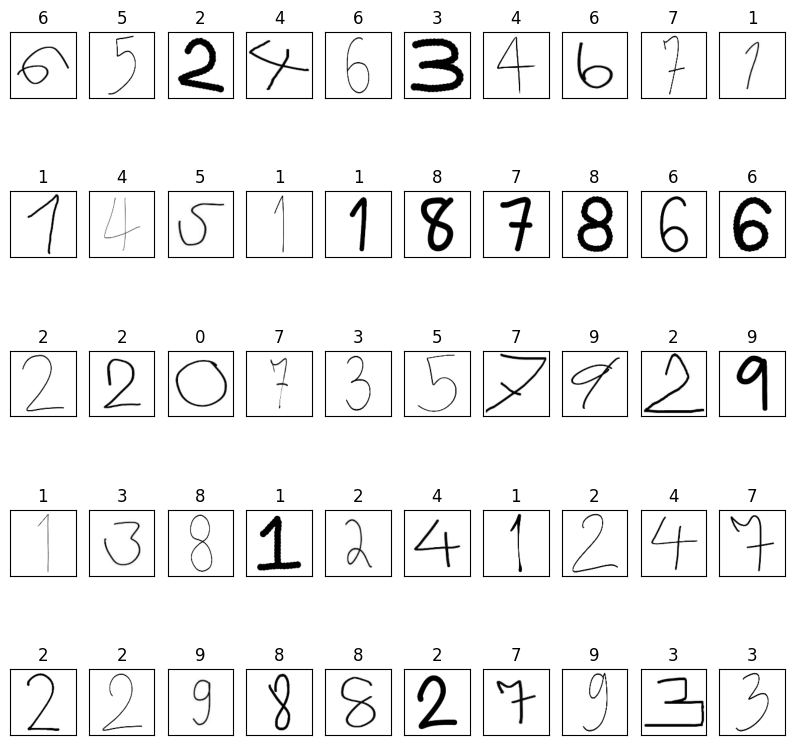

In [48]:
visual_multi(0)

In [49]:
img_r_r2 = []
for i in range(45):
  img_r_r2.append(cv2.resize(img_r_r[i], (112, 112)))
img_r_r2 = np.array(img_r_r2)
img_r_r2.shape

(45, 112, 112)

In [50]:
img_r_r2 = img_r_r_c.reshape(50, 112, 112,1)

**ปรับข้อมูลให้อยู่ในช่วง 0,1**

In [51]:
print(np.min(img_r_r2),np.max(img_r_r2))

0.0 255.0


In [52]:
img_r_r_n = img_r_r2.astype('float32')/255

**ทำนายภาพด้วยโมเดลจาก mnist**

In [90]:
Real=model.predict(img_r_r_n)
Real_pred_cls=np.argmax(Real,axis=1)

2/2 [==============================] - 0s 9ms/step


In [91]:
#ดูจำนวนภาพที่ผิด
idx_miss=np.where(Real_pred_cls != y_r)
print(len(idx_miss[0]))

12


In [92]:
#หาค่า accuracy
print("accuracy",round((1 - len(idx_miss[0])/len(y_r))*100,2),"%")

accuracy 76.0 %


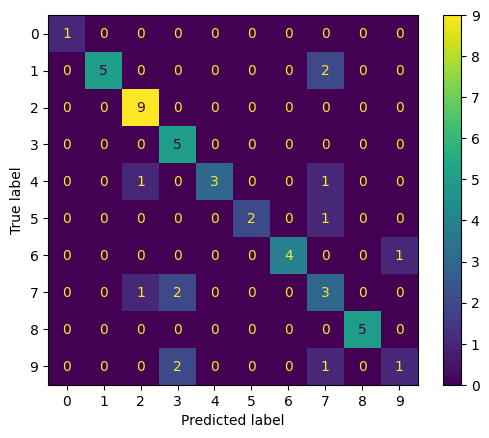

In [93]:
#สร้าง confustion_matrix เพื่อดูว่าเลขไหนถูกผิดยังไงบ้าง
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_r, Real_pred_cls)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_r,Real_pred_cls))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      0.71      0.83         7
           2       0.82      1.00      0.90         9
           3       0.56      1.00      0.71         5
           4       1.00      0.60      0.75         5
           5       1.00      0.67      0.80         3
           6       1.00      0.80      0.89         5
           7       0.38      0.50      0.43         6
           8       1.00      1.00      1.00         5
           9       0.50      0.25      0.33         4

    accuracy                           0.76        50
   macro avg       0.82      0.75      0.76        50
weighted avg       0.81      0.76      0.76        50



In [95]:
img_miss = img_r_r_c[idx_miss]

In [96]:
def visual_multi_error(x,y,i):
  nplots=len(idx_miss[0])
  fig=plt.figure(figsize= (10,10))
  for j in range(nplots):
    plt.subplot(5,10,j+1)
    plt.imshow(x[i+j],cmap=plt.cm.gray_r)
    plt.title(y[idx_miss][i+j]) #เขียนกำกับเลข
    plt.xticks([])
    plt.yticks([])
  plt.show()

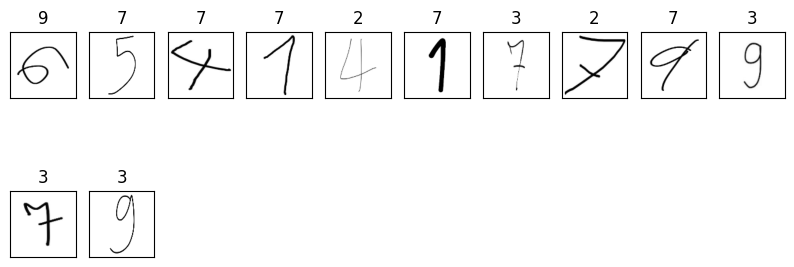

In [97]:
visual_multi_error(img_miss,Real_pred_cls,0)

In [98]:
idx_miss

(array([ 0,  1,  3, 10, 11, 14, 23, 26, 27, 42, 46, 47]),)

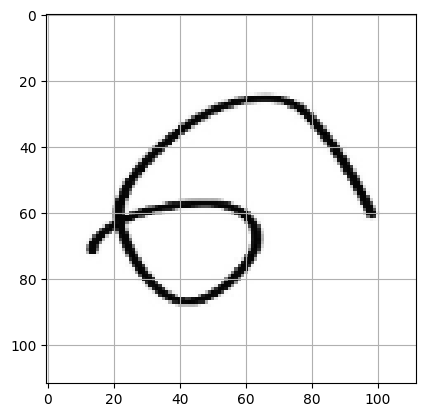

In [99]:
img = img_r_r_c[0]
plt.imshow(img,cmap=plt.cm.gray_r)
plt.grid()
plt.show()